In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df=pd.read_csv('supply_chain_data.csv')

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [5]:
df.shape

(100, 24)

In [6]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [8]:
df.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [9]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

# Exploratory Data Analysis

# Relationship between the price of the products and the revenue generated by them:

C:\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


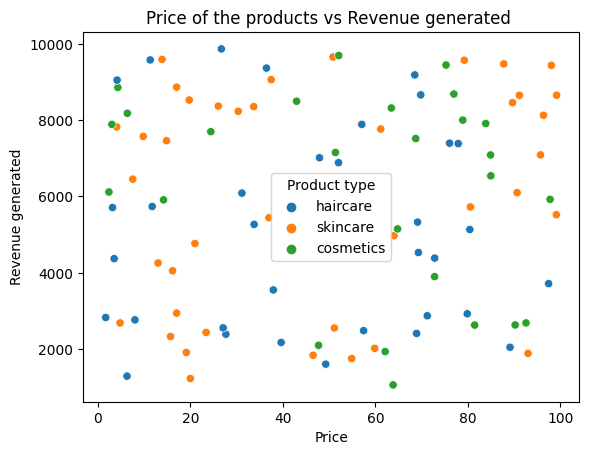

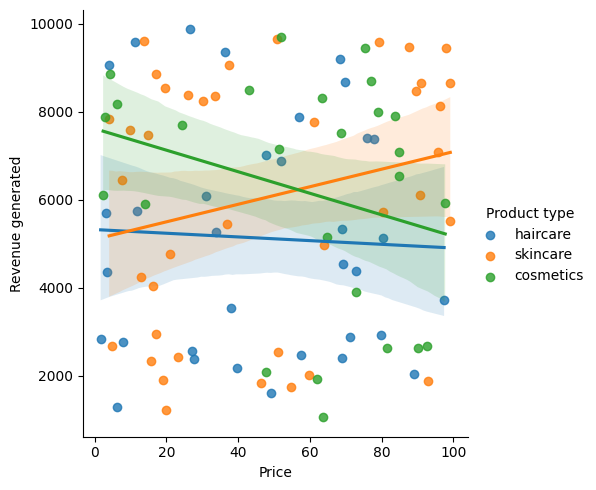

In [29]:
sns.scatterplot(data=df,x='Price',y='Revenue generated',hue='Product type')
plt.title('Price of the products vs Revenue generated ')
sns.lmplot(x='Price',y='Revenue generated',data=df,hue='Product type')
plt.show()

Thus, the company derives more revenue from skincare products, and the higher the price of skincare products, the more revenue they generate.

# Sales by product type:

In [31]:
sales_data=df.groupby('Product type')['Number of products sold'].sum().reset_index()
plt.pie(x=)

In [37]:
pie_chart = px.pie(sales_data, values='Number of products sold', names='Product type', 
                   title='Sales by Product Type', 
                   hover_data=['Number of products sold'],hole=0.5)
pie_chart.show()

So 45% of the business comes from skincare products, 29.5% from haircare, and 25.5% from cosmetics.

# Total revenue generated from shipping carriers:

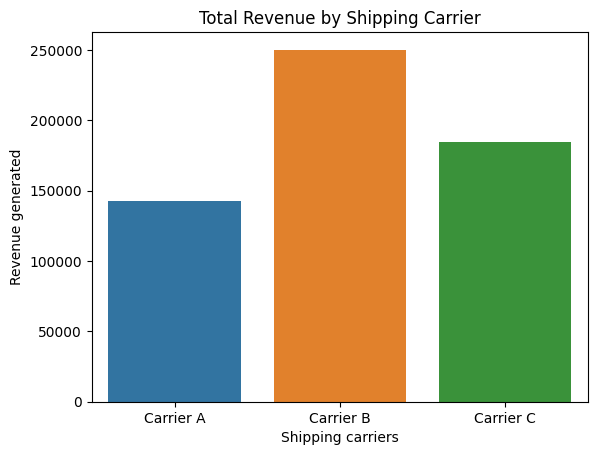

In [43]:
total_revenue=df.groupby('Shipping carriers')['Revenue generated'].sum().reset_index()
sns.barplot(x='Shipping carriers',y='Revenue generated',data=total_revenue)
plt.title('Total Revenue by Shipping Carrier')
plt.show()

So the company is using three carriers for transportation, and Carrier B helps the company in generating more revenue.

# Average lead time and Average Manufacturing Costs for all products of the company:

In [50]:
avg_lead_time=df.groupby('Product type')['Lead time'].mean().reset_index()
avg_manufac_costs=df.groupby('Product type')['Manufacturing costs'].mean().reset_index()
result=pd.merge(avg_lead_time,avg_manufac_costs,on='Product type')
result.rename(columns={'Lead time':'Avg Lead time','Manufacturing costs':'Avg Manufac costs'},inplace=True)
print(result)

  Product type  Avg Lead time  Avg Manufac costs
0    cosmetics      13.538462          43.052740
1     haircare      18.705882          48.457993
2     skincare      18.000000          48.993157


# Revenue generated by each SKU(Stock Keeping Units):

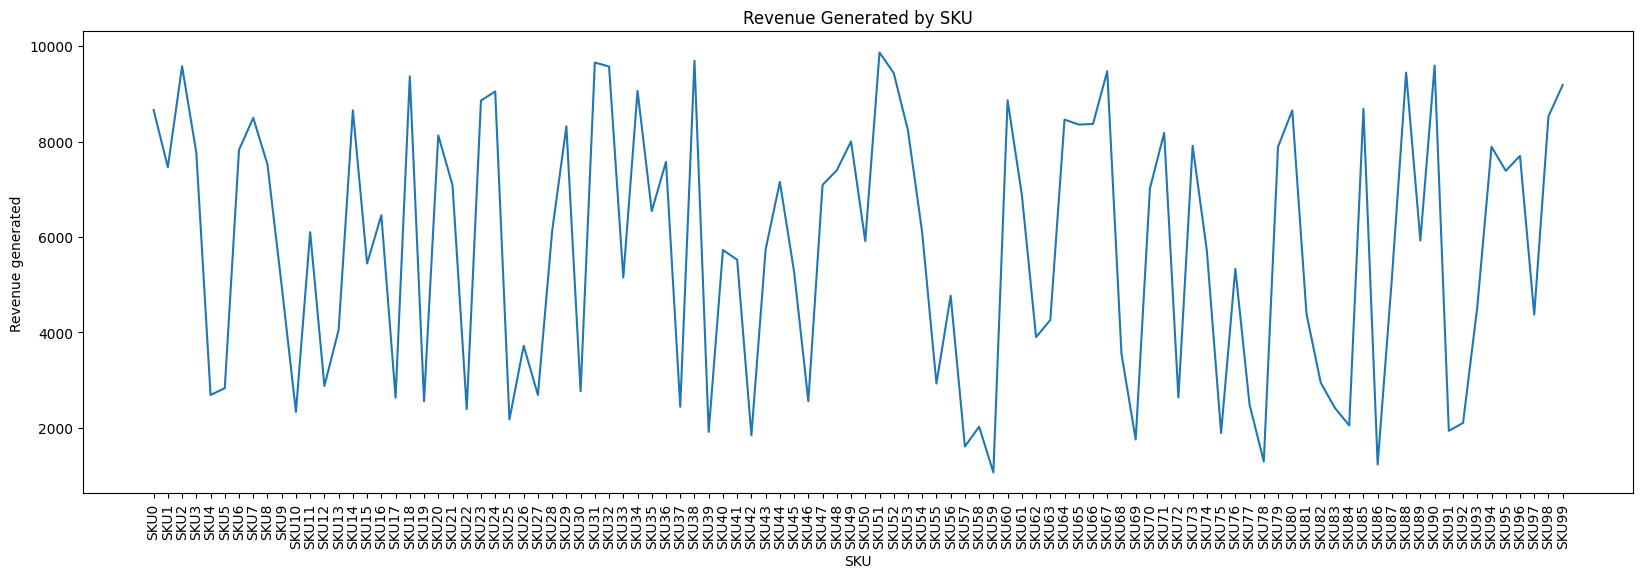

In [57]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x='SKU',y='Revenue generated')
plt.title('Revenue Generated by SKU')
plt.xticks(rotation=90)
plt.show()

# Stock levels of each SKU:

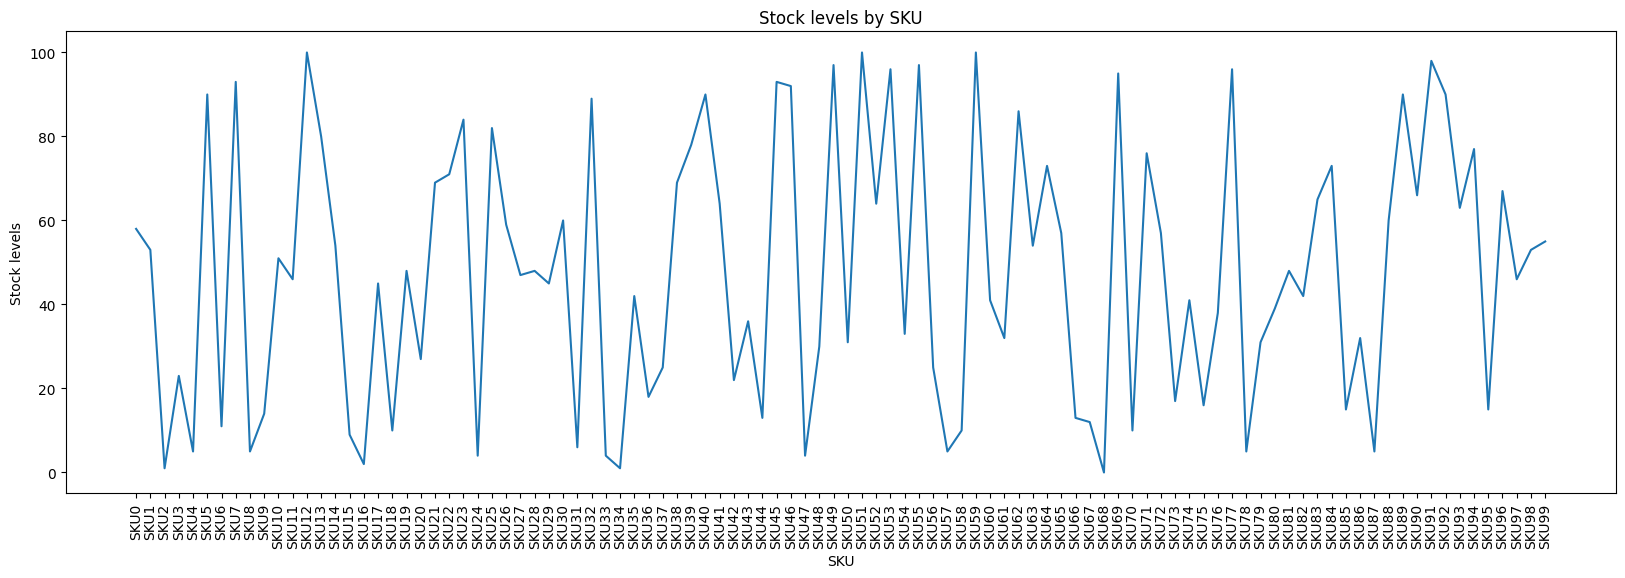

In [59]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df,x='SKU',y='Stock levels')
plt.title('Stock levels by SKU')
plt.xticks(rotation=90)
plt.show()

# Order quantity of each SKU:

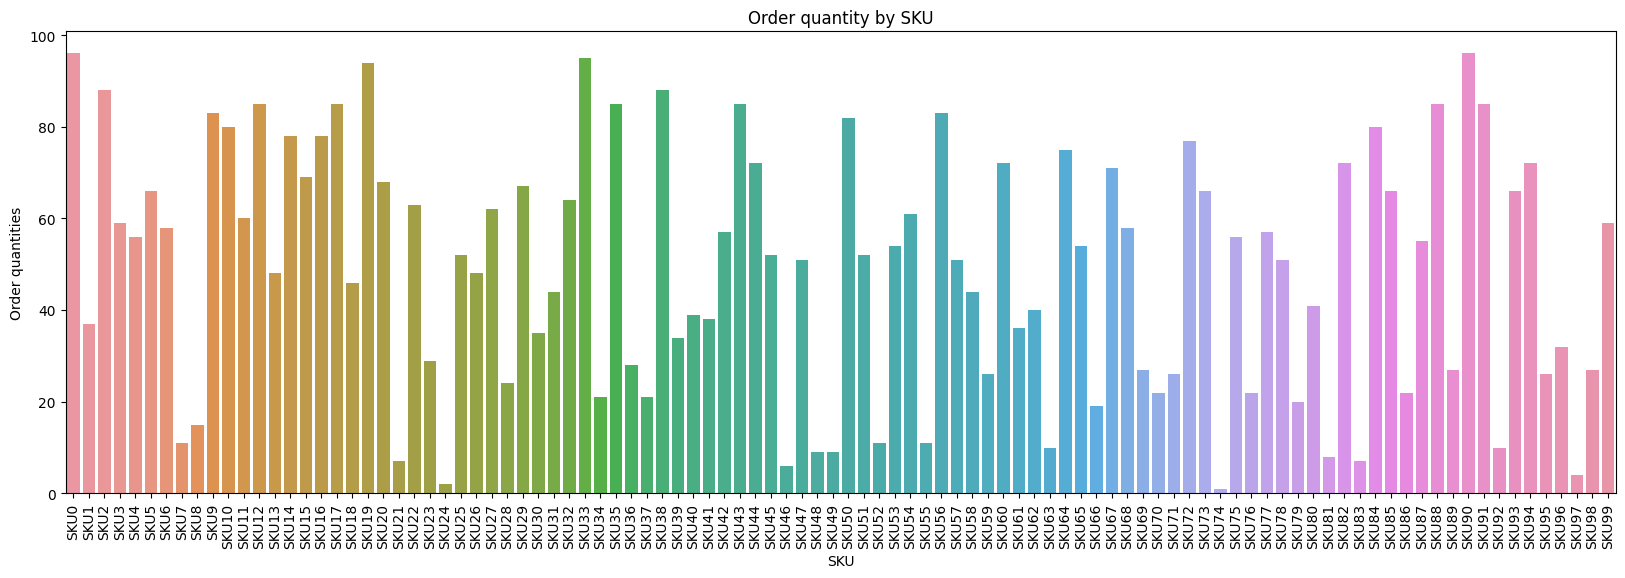

In [61]:
plt.figure(figsize=(20,6))
sns.barplot(data=df,x='SKU',y='Order quantities')
plt.xticks(rotation=90)
plt.title('Order quantity by SKU')
plt.show()

# Shipping cost of Carriers:

In [71]:
px.bar(df, x='Shipping carriers',y='Shipping costs',title='Shipping Costs by Carrier')

We discovered that Carrier B helps the company in more revenue. It is also the most costly Carrier among the three. 

# Cost distribution by transportation mode:

In [79]:
px.pie(df,values='Costs',names='Transportation modes',hole=0.6,title='Cost Distribution by Transportation Mode')

So the company spends more on Road and Rail modes of transportation for the transportation of Goods.

# Analyzing Defect Rate

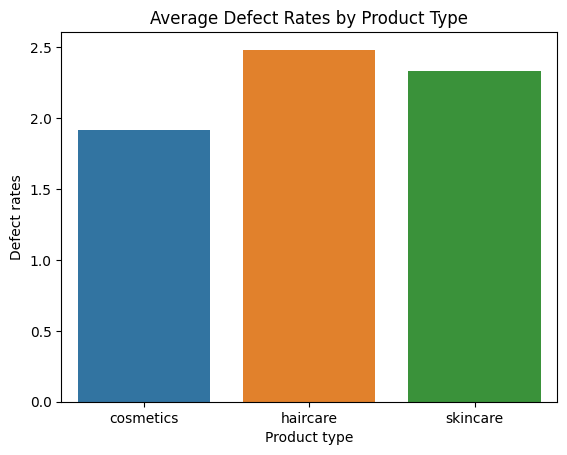

In [84]:
defect_rates=df.groupby('Product type')['Defect rates'].mean().reset_index()
sns.barplot(x='Product type',y='Defect rates',data=defect_rates)
plt.title('Average Defect Rates by Product Type')
plt.show()

So the defect rate of haircare products is higher. 

# Defect rates by mode of transportation:

In [87]:
px.pie(df,names='Transportation modes',values='Defect rates',hole=0.5,title='Defect rate by Mode of Transportation')

Road transportation results in a higher defect rate, and Sea transportation has the lowest defect rate.